In [1]:
#packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as ls 
from tqdm import tqdm
from scipy.signal import find_peaks
import networkx as nx 
#import source_file as sf
#import importlib
#importlib.reload(sf)


import matplotlib as mpl
mpl.rc('font', size=18)
mpl.rc('legend', fontsize=18)
mpl.rc('legend', numpoints=1)
mpl.rc('legend', handlelength=1.5)
mpl.rc('legend', frameon=False)
#mpl.rc('xtick.major', pad=7)
#mpl.rc('xtick.minor', pad=7)
mpl.rc('lines', lw=2)
mpl.rc('xtick',labelsize =15) 
mpl.rc('ytick',labelsize =15)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
#Complete graph Hamiltonian
def H_CG(N,gamma,w,kappa):
    #Hamiltonian matrix
    ket_s = (1.0/np.sqrt(N))*np.ones((N,1))
    H = -gamma*N*np.dot(ket_s,np.conjugate(ket_s).transpose())
        
    # Ensure H can handle complex numbers
    H = H.astype(complex)

    H[w,w] = H[w,w] - 1 - 1j*kappa
    
    return H   

In [3]:
N = 500
w  = 10
kappa = [0]
#kappa = [1]
#gamma = [0.9/N, 1.0/N, 1.1/N]
gamma = [0.9/N]

T = 400
dt = 0.01
m  = int(T/dt)

r = np.unique(np.linspace(1,6000,50, dtype =int))

w_prob_coh = np.zeros((len(r),len(gamma),len(kappa),m))
#s_prob = np.zeros((len(r),len(gamma),len(kappa),m))

#target state
ket_w = np.zeros((N,1))
ket_w[w] = 1


for k in tqdm(range(len(r))):

    for kk in range(len(gamma)):

        for kkk in range(len(kappa)):
        
            #The Hamiltonian
            H =  H_CG(N,gamma[kk],w,kappa[kkk])

            #initial state
            psi_0 = (1.0/np.sqrt(N))*np.ones((N,1))

            #reset state
            psi_r = (1.0/np.sqrt(N))*np.ones((N,1))       

            #Initial overlap
            #s_prob[k,kk,kkk,0] = np.abs(np.vdot(psi_0,psi_0))
            w_prob_coh[k,kk,kkk,0] = np.abs(np.vdot(ket_w,psi_0))**2

            #Time Evolution operator
            ut = np.asarray(ls.expm(-(1.0j)*H*dt))

            for j in range(1,m): 

                if j%r[k] != 0:       

                    #wavefunction after time evolution of dt
                    psit = ut.dot(psi_0)    

                    #survival probability
                    #s_prob[k,kk,kkk,j] = np.abs(np.vdot(psit,psit))
                    w_prob_coh[k,kk,kkk,j] = np.abs(np.vdot(ket_w,psit))**2
                    
                    psi_0 = psit  
                
                else: # reset conditions
                    psi_0 = psi_r

                    #survival probability
                    #s_prob[k,kk,kkk,j] = np.abs(np.vdot(psi_0,psi_0))
                    w_prob_coh[k,kk,kkk,j] = np.abs(np.vdot(ket_w,psi_0))**2

 10%|█         | 5/50 [00:10<01:32,  2.06s/it]


KeyboardInterrupt: 

In [11]:
r1 = np.unique(np.linspace(1,6000,50, dtype =int))

#gamma indices
g = 0

f_max_coh_r0 = np.zeros(len(r1))
T_max_coh_r0 = np.zeros(len(r1))

for i in range(len(r1)):

    f_max_coh_r0[i]  = np.max(np.round(w_prob_coh[i,g,0,:],8))
    T_max_coh_r0[i] = np.argmax(np.round(w_prob_coh[i,g,0,:],8))*dt #argmax compute the first maxima


Q_coh_r0 = np.zeros(len(r1))

for i in range(len(r1)):
     Q_coh_r0[i] =  T_max_coh_r0[i]/ f_max_coh_r0[i]

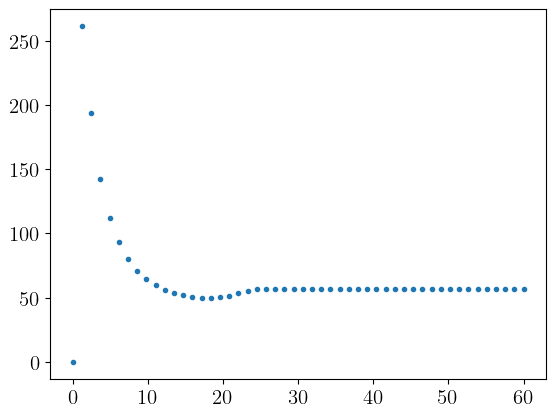

In [12]:
plt.plot(r1*0.01,Q_coh_r0,'.' ,label = f'$\\kappa = 0.01, \\gamma N = {gamma[0]*N}$')

In [17]:
r1[np.argmin(Q_coh_r0[1:])]*0.01

np.float64(15.92)

array([0.01      , 0.02689655, 0.0437931 , 0.06068966, 0.07758621,
       0.09448276, 0.11137931, 0.12827586, 0.14517241, 0.16206897,
       0.17896552, 0.19586207, 0.21275862, 0.22965517, 0.24655172,
       0.26344828, 0.28034483, 0.29724138, 0.31413793, 0.33103448,
       0.34793103, 0.36482759, 0.38172414, 0.39862069, 0.41551724,
       0.43241379, 0.44931034, 0.4662069 , 0.48310345, 0.5       ])

In [7]:
N = 500
w  = 10
kappa = np.linspace(0.01,0.5,30)
#kappa = [1]
gamma = [0.9/N, 1.1/N]
#gamma = [1.0/N]

T = 400
dt = 0.01
m  = int(T/dt)

r = np.unique(np.linspace(1,6000,50, dtype =int))

w_prob = np.zeros((len(r),len(gamma),len(kappa),m))
s_prob = np.zeros((len(r),len(gamma),len(kappa),m))

#target state
ket_w = np.zeros((N,1))
ket_w[w] = 1


for k in tqdm(range(len(r))):

    for kk in range(len(gamma)):

        for kkk in range(len(kappa)):
        
            #The Hamiltonian
            H =  H_CG(N,gamma[kk],w,kappa[kkk])

            #initial state
            psi_0 = (1.0/np.sqrt(N))*np.ones((N,1))

            #reset state
            psi_r = (1.0/np.sqrt(N))*np.ones((N,1))       

            #Initial overlap
            s_prob[k,kk,kkk,0] = np.abs(np.vdot(psi_0,psi_0))
            w_prob[k,kk,kkk,0] = np.abs(np.vdot(ket_w,psi_0))**2

            #Time Evolution operator
            ut = np.asarray(ls.expm(-(1.0j)*H*dt))

            for j in range(1,m): 

                if j%r[k] != 0:       

                    #wavefunction after time evolution of dt
                    psit = ut.dot(psi_0)    

                    #survival probability
                    s_prob[k,kk,kkk,j] = np.abs(np.vdot(psit,psit))
                    w_prob[k,kk,kkk,j] = np.abs(np.vdot(ket_w,psit))**2
                    
                    psi_0 = psit  
                
                else: # reset conditions
                    psi_0 = np.sqrt(s_prob[k,kk,kkk,j-1])*psi_r

                    #survival probability
                    s_prob[k,kk,kkk,j] = np.abs(np.vdot(psi_0,psi_0))
                    w_prob[k,kk,kkk,j] = np.abs(np.vdot(ket_w,psi_0))**2


100%|██████████| 50/50 [2:44:56<00:00, 197.93s/it]  


In [8]:
r = np.unique(np.linspace(1,6000,50, dtype =int))*0.01

f_max_r = np.zeros((len(gamma),len(kappa),len(r)))
T_max_r = np.zeros((len(gamma),len(kappa),len(r)))

for gg in range(len(gamma)):
    for k in range(len(kappa)):

        for i in range(len(r)):
        
            f_max_r[gg,k,i]  = np.max(np.round(w_prob[i,gg,k,:],8))
            T_max_r[gg,k,i] = np.argmax(np.round(w_prob[i,gg,k,:],8))*dt #argmax compute the first maxima


Q_r = np.zeros((len(gamma),len(kappa),len(r)))

for gg in range(len(gamma)):
    for k in range(len(kappa)):
        for i in range(len(r)):
            Q_r[gg,k,i] = T_max_r[gg,k,i]/f_max_r[gg,k,i]

In [11]:
#kappa = [0.01,0.05,0.1, 0.15,0.2]
T_min_opt = np.zeros((len(gamma),len(kappa)))
r_opt = np.zeros((len(gamma),len(kappa) ))

#T_min_opt[0] = np.min(Q_coh_r0[1:])
#r_opt[0] = r1[np.argmin(Q_coh_r0[1:])]*0.01
for gg in range(len(gamma)):
    for i in range(len(kappa)):

        T_min_opt[gg,i] = np.min(Q_r[gg,i][1:])
        r_opt[gg,i] = r[np.argmin(Q_r[gg,i][1:])]*0.01

        

In [12]:
def find_transition_point(arr):
    left, right = 0, len(arr) - 1
    
    while left < right:
        mid = (left + right) // 2
        if arr[mid] > 0.5:
            left = mid + 1  # Search in the right half
        else:
            right = mid  # Search in the left half
            
    return left if arr[left] <= 0.5 else 0  # Return index or 0 if no transition

In [13]:
r = np.unique(np.linspace(1,6000,50, dtype =int))*0.01

T_decay_r = np.zeros((len(gamma),len(kappa),len(r)))

for gg in range(len(gamma)):
    for k in range(len(kappa)):
        for i in range(len(r)):
        
            T_decay_r[gg,k,i]  = find_transition_point(s_prob[i,gg,k,:])*0.01

In [16]:
T_min_opt_s = np.zeros((len(gamma),len(kappa)))
r_opt_s = np.zeros((len(gamma),len(kappa) ))

for gg in range(len(gamma)):
    for i in range(len(kappa)):

        T_min_opt_s[gg,i] = np.min(T_decay_r[gg,i][T_decay_r[gg,i]>0])
        r_opt_s[gg,i] = r[np.argmin(T_decay_r[gg,i][T_decay_r[gg,i]>0])]*0.01

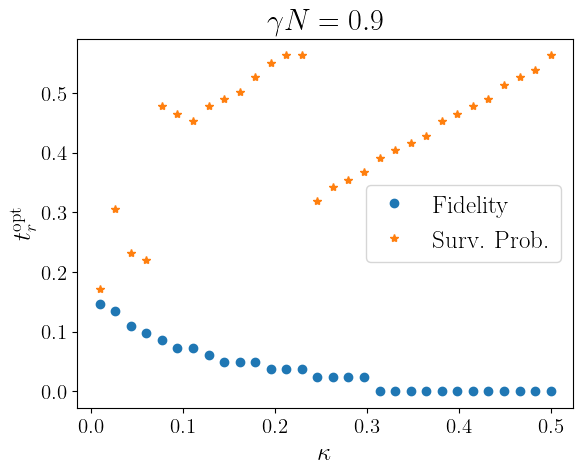

In [18]:
plt.plot(kappa,r_opt[0],'o',label = r'Fidelity')
plt.plot(kappa,r_opt_s[0],'*', label = r'Surv. Prob.')

plt.legend(frameon = True)
plt.title(f'$\\gamma N = {gamma[0]*N}$')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$t_r^{\rm opt}$')
plt.show()

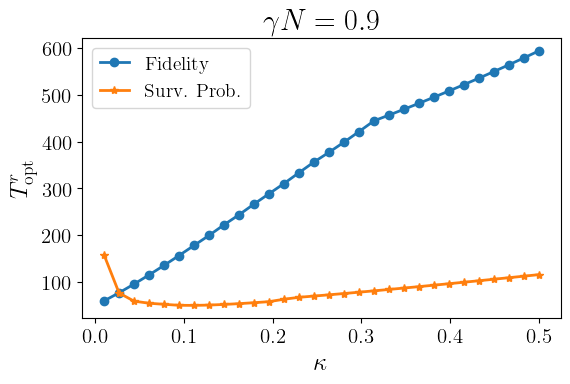

In [20]:
fig = plt.figure(figsize = (3.41667*1.4, 2*1.4))
ax = fig.add_axes([0,0,1,1])


plt.plot(kappa,T_min_opt[0],'-o',label =r'Fidelity')
plt.plot(kappa,T_min_opt_s[0],'-*', label = r'Surv. Prob.')


plt.title(f'$\\gamma N = {gamma[0]*N}$')
plt.legend(frameon = True, fontsize = 14)
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$T^{r}_{\rm opt}$')

#plt.savefig('optimal_reset_time.pdf',bbox_inches = 'tight', dpi = 600, transparent = True)
plt.show()

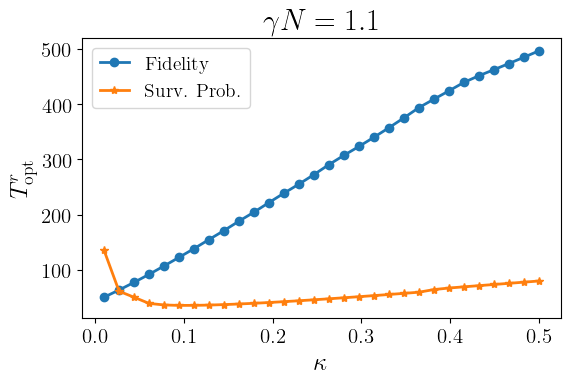

In [22]:
fig = plt.figure(figsize = (3.41667*1.4, 2*1.4))
ax = fig.add_axes([0,0,1,1])


plt.plot(kappa,T_min_opt[1],'-o',label =r'Fidelity')
plt.plot(kappa,T_min_opt_s[1],'-*', label = r'Surv. Prob.')


plt.title(f'$\\gamma N = {gamma[1]*N}$')
plt.legend(frameon = True, fontsize = 14)
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$T^{r}_{\rm opt}$')

plt.savefig('../Figures/Presentation/optimal_reset_time.pdf',bbox_inches = 'tight', dpi = 600, transparent = True)
plt.show()

np.int64(19)